In [ ]:
import networkx as nx
import pyalex
from pyalex import Works, Institutions, Topics
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import chain
import numpy as np
import scipy
pyalex.config.email = "aymann.mhammedi@gmail.com"

In [19]:
# Fetch a list of topics
topics = Topics().get()

# Print the list of topics with their IDs and display names
for topic in topics:
    print('/t')
    print(f"ID: {topic['id']}, Display Name: {topic['display_name']}, Description: {topic['description']}")

/t
ID: https://openalex.org/T11881, Display Name: Crystallization and Solubility Studies, Description: This cluster of papers focuses on the crystallization processes and control, including topics such as nucleation, solubility, polymorphism, ultrasound-assisted crystallization, process analytical technology, crystal growth, pharmaceutical crystallization, continuous crystallization, and crystal engineering.
/t
ID: https://openalex.org/T11475, Display Name: French Urban and Social Studies, Description: This cluster of papers explores the intersection of territorial governance, environmental participation, and sustainable development. It delves into topics such as citizen participation, local development, social justice, and community engagement in the context of rural territories. The papers also discuss the role of proximity and innovation in shaping public policy for sustainable and inclusive development.
/t
ID: https://openalex.org/T13445, Display Name: American Constitutional Law a

In [13]:
topics.meta

{'count': 4516,
 'db_response_time_ms': 18,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

In [18]:
topics[2]

{'id': 'https://openalex.org/T13445',
 'display_name': 'American Constitutional Law and Politics',
 'description': 'This cluster of papers explores the development of American political thought and history, focusing on topics such as the American founding, constitutional government, religious freedom, public opinion, separation of church and state, presidential prerogative, early republic, federalism, political philosophy, and nationalism.',
 'keywords': ['American founding',
  'Constitutional government',
  'Religious freedom',
  'Public opinion',
  'Separation of church and state',
  'Presidential prerogative',
  'Early Republic',
  'Federalism',
  'Political philosophy',
  'Nationalism'],
 'ids': {'openalex': 'https://openalex.org/T13445',
  'wikipedia': 'https://en.wikipedia.org/wiki/American_political_history'},
 'subfield': {'id': 'https://openalex.org/subfields/3320',
  'display_name': 'Political Science and International Relations'},
 'field': {'id': 'https://openalex.org/field

In [3]:
# Define the filter criteria for works published in the USA in 2015
filter_criteria = {
    "publication_year": 2018,  # Filter for works published in 2015
    "institutions": {"country_code": "us"},
    "primary_location": {"source": {"type": "journal"}},  # Filter for journal articles
    #"primary_topic": {"domain": {"id": 4}},  # Filter for Health science
    "primary_topic": {"subfield": {"id": 2740}},  # Filter for Pulmonary and Respiratory Medicine
}

# Fetch the works with pagination
query = Works().filter(**filter_criteria)
all_works_2018 = list(chain.from_iterable(query.paginate(per_page=200, n_max=None)))  # Adjust per_page as needed, n_max=None for all papers (heavy)

# Count the number of works
num_works = len(all_works_2018)

# Print the number of works
print(f"Number of works published in the USA in 2015: {num_works}")

# Optionally, print the first few works to verify
for work in all_works_2018[:5]:  # Print the first 5 works as an example
    print(f"ID: {work['id']}, Title: {work['title']}, Publication Year: {work['publication_year']}")

Number of works published in the USA in 2015: 19382
ID: https://openalex.org/W2792937256, Title: Nivolumab plus Ipilimumab versus Sunitinib in Advanced Renal-Cell Carcinoma, Publication Year: 2018
ID: https://openalex.org/W2784371446, Title: The biology and management of non-small cell lung cancer, Publication Year: 2018
ID: https://openalex.org/W2904180601, Title: Haemodynamic definitions and updated clinical classification of pulmonary hypertension, Publication Year: 2018
ID: https://openalex.org/W2793905111, Title: MRI-Targeted or Standard Biopsy for Prostate-Cancer Diagnosis, Publication Year: 2018
ID: https://openalex.org/W2790254562, Title: Efficacy of Larotrectinib in<i>TRK</i>Fusion–Positive Cancers in Adults and Children, Publication Year: 2018


In [5]:
# Count the number of unique work IDs
unique_work_ids = len(set(work['id'] for work in all_works_2018))

# Print the result
print(f"Number of unique work IDs: {unique_work_ids}")

Number of unique work IDs: 19382


## COAUTHORSHIP

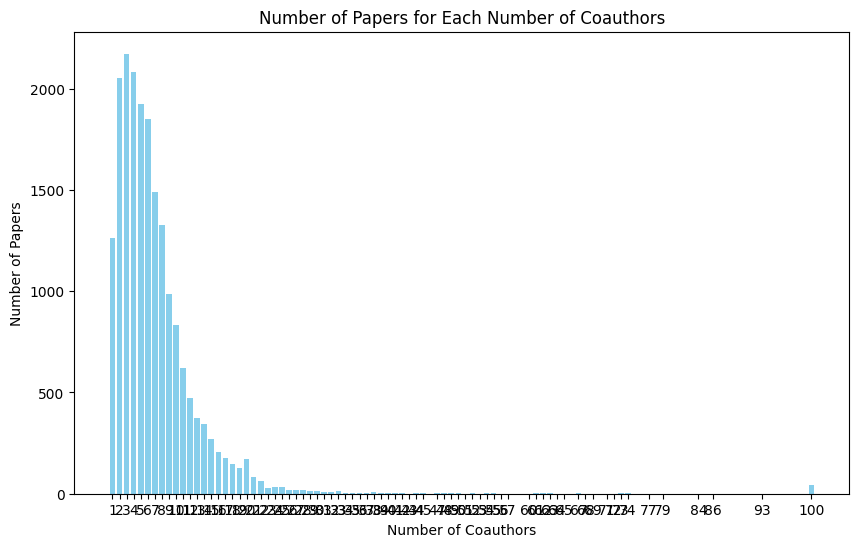

In [6]:
# Count the number of coauthors for each work
coauthor_counts = Counter(len(work['authorships']) for work in all_works_2018)

# Prepare data for plotting
coauthor_numbers = list(coauthor_counts.keys())
paper_counts = list(coauthor_counts.values())

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(coauthor_numbers, paper_counts, color='skyblue')
plt.xlabel('Number of Coauthors')
plt.ylabel('Number of Papers')
plt.title('Number of Papers for Each Number of Coauthors')
plt.xticks(coauthor_numbers)
plt.show()

In [7]:
# Count the number of authors for each work and store in all_works_2018
for work in all_works_2018:
    work['num_authors'] = len(work['authorships'])
#get total number of authors
total_coauthors = sum(work['num_authors'] for work in all_works_2018)
#get total of unique authors
unique_authors = set()
for work in all_works_2018:
    for author in work['authorships']:
        unique_authors.add(author['author']['id'])
mean_coauthors = total_coauthors / num_works

print(f"Total number of authors: {total_coauthors}")
print(f"Total number of unique authors: {len(unique_authors)}")
print(f"Mean number of coauthors per paper: {mean_coauthors:.2f}")


Total number of authors: 138276
Total number of unique authors: 82789
Mean number of coauthors per paper: 7.13


In [8]:
all_works_2018[0]['authorships'][0]['countries']

['US']

In [9]:
# Get total number of unique institutions
unique_institutions = set()
for work in all_works_2018:
    for author in work['authorships']:
        for institution in author['institutions']:
            unique_institutions.add(institution['id'])
print(f"Total number of unique institutions: {len(unique_institutions)}")

Total number of unique institutions: 8341


Text(0.5, 0, 'Number of Institutions')

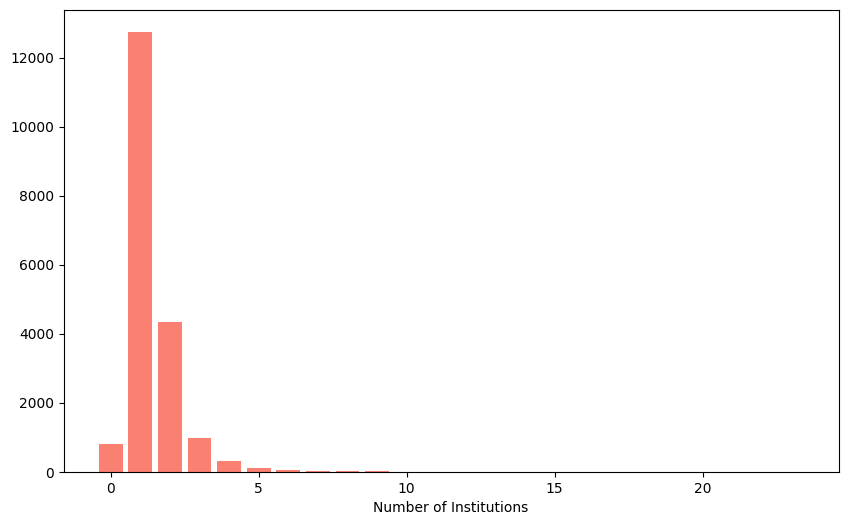

In [10]:
# Plot number of unique institutions per paper
institution_counts = Counter(len(work['authorships'][0]['institutions']) for work in all_works_2018)
institution_numbers = list(institution_counts.keys())
institution_paper_counts = list(institution_counts.values())
plt.figure(figsize=(10, 6))
plt.bar(institution_numbers, institution_paper_counts, color='salmon')
plt.xlabel('Number of Institutions')

In [11]:
# For each work generate dummy variable if at least one coauthor is from china, add it to all_works_2018
for work in all_works_2018:
    work['has_chinese_coauthor'] = any('CN' in author['countries'] for author in work['authorships'])
# Count the number of works with at least one Chinese coauthor
num_works_with_chinese_coauthor = sum(work['has_chinese_coauthor'] for work in all_works_2018)
print(f"Number of works with at least one Chinese coauthor: {num_works_with_chinese_coauthor}")
print(f"Percentage of works with at least one Chinese coauthor: {num_works_with_chinese_coauthor / num_works * 100:.2f}%")

Number of works with at least one Chinese coauthor: 925
Percentage of works with at least one Chinese coauthor: 4.77%


In [12]:
# Count the number of Chinese coauthors
chinese_coauthors = sum(
    1
    for work in all_works_2018
    for authorship in work['authorships']
    for inst in authorship.get('institutions', [])
    if inst.get('country_code') == 'CN'
)

# Print the result
print(f"Number of Chinese coauthors: {chinese_coauthors}")

Number of Chinese coauthors: 7252


In [13]:
#For each work generate dummy variable if all authors are from USA, add it to all_works_2018
for work in all_works_2018:
    work['all_authors_from_usa'] = all('US' in author['countries'] for author in work['authorships'])
# Count the number of works with all authors from the USA
num_works_all_authors_from_usa = sum(work['all_authors_from_usa'] for work in all_works_2018)
print(f"Number of works with all authors from the USA: {num_works_all_authors_from_usa}")

Number of works with all authors from the USA: 13111


## QUALITY OF RESEARCH

In [14]:
# Get min max mean and deciles of cited_by_count
cited_by_counts = [work['cited_by_count'] for work in all_works_2018]
min_cited_by_count = min(cited_by_counts)
max_cited_by_count = max(cited_by_counts)
mean_cited_by_count = np.mean(cited_by_counts)
deciles = np.percentile(cited_by_counts, np.arange(0, 101, 10))
print(f"Min cited_by_count: {min_cited_by_count}")
print(f"Max cited_by_count: {max_cited_by_count}")
print(f"Mean cited_by_count: {mean_cited_by_count:.2f}")
print(f"Deciles of cited_by_count: {deciles}")

Min cited_by_count: 0
Max cited_by_count: 3957
Mean cited_by_count: 23.27
Deciles of cited_by_count: [0.000e+00 0.000e+00 0.000e+00 1.000e+00 2.000e+00 5.000e+00 1.000e+01
 1.600e+01 2.700e+01 5.000e+01 3.957e+03]


<BarContainer object of 414 artists>

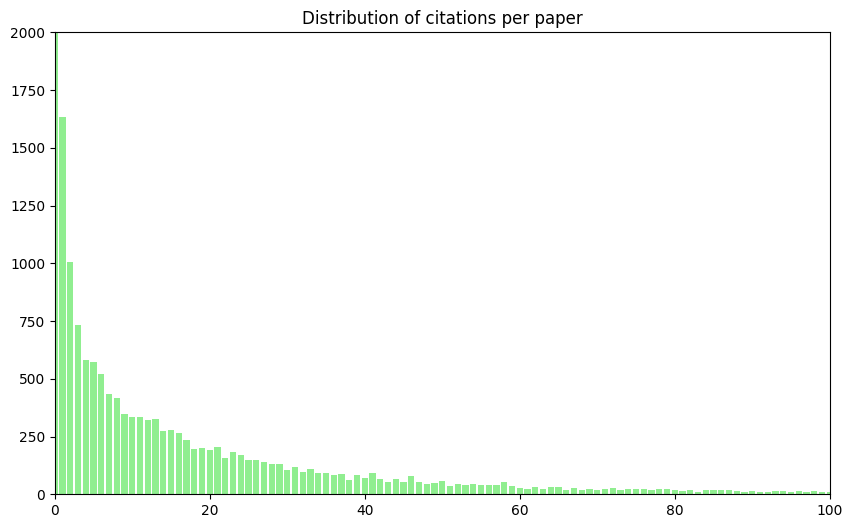

In [20]:
# Distribution of citations per paper
citations_counts = Counter(work['cited_by_count'] for work in all_works_2018)
# Prepare data for plotting
citation_numbers = list(citations_counts.keys())
citation_paper_counts = list(citations_counts.values())
# Plot the data
plt.figure(figsize=(10, 6))
plt.xlim(0, 100)
plt.ylim(0, 2000)
plt.title("Distribution of citations per paper")
plt.bar(citation_numbers, citation_paper_counts, color='lightgreen')

In [16]:
#Mean citations for paperss with and without Chinese coauthors
mean_citations_with_chinese = np.mean([work['cited_by_count'] for work in all_works_2018 if work['has_chinese_coauthor']])
mean_citations_without_chinese = np.mean([work['cited_by_count'] for work in all_works_2018 if not work['has_chinese_coauthor']])
print(f"Mean citations for papers with Chinese coauthors: {mean_citations_with_chinese:.2f}")
print(f"Mean citations for papers without Chinese coauthors: {mean_citations_without_chinese:.2f}")

Mean citations for papers with Chinese coauthors: 36.81
Mean citations for papers without Chinese coauthors: 22.60


## EXPOSURE TO POLICY

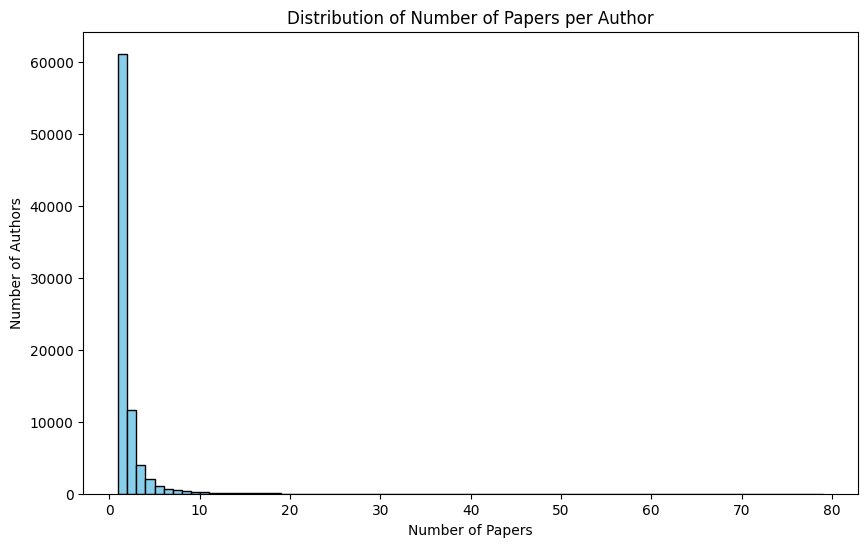

In [17]:
# Count the number of papers per author
author_paper_counts = Counter(
    authorship['author']['id']
    for work in all_works_2018
    for authorship in work['authorships']
)

# Prepare data for plotting
authors = list(author_paper_counts.keys())
paper_counts = list(author_paper_counts.values())

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(paper_counts, bins=range(1, max(paper_counts) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Number of Papers')
plt.ylabel('Number of Authors')
plt.title('Distribution of Number of Papers per Author')
plt.show()

Text(0.5, 1.0, 'Distribution of Share of Papers with Chinese Coauthors for US Authors')

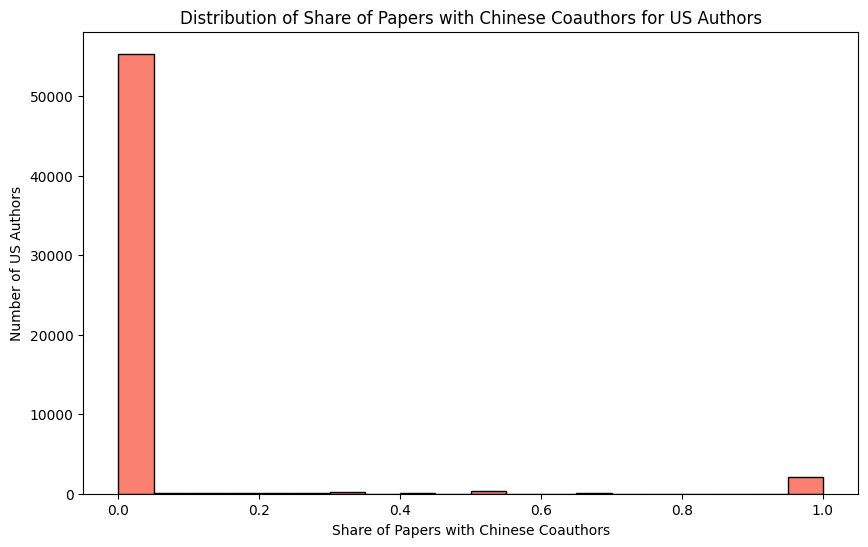

In [18]:
# For each US author compute share of papers with Chinese coauthors
for work in all_works_2018:
    for authorship in work['authorships']:
        if 'US' in authorship['countries']:
            authorship['has_chinese_coauthor'] = any('CN' in author['countries'] for author in work['authorships'])
# Count the number of papers for each US author
us_author_paper_counts = defaultdict(int)
for work in all_works_2018:
    for authorship in work['authorships']:
        if 'US' in authorship['countries']:
            us_author_paper_counts[authorship['author']['id']] += 1
# Compute the share of papers with Chinese coauthors for each US author
us_author_chinese_coauthor_counts = defaultdict(int)
for work in all_works_2018:
    for authorship in work['authorships']:
        if 'US' in authorship['countries'] and authorship.get('has_chinese_coauthor'):
            us_author_chinese_coauthor_counts[authorship['author']['id']] += 1
# Compute the share of papers with Chinese coauthors for each US author
us_author_shares = {
    author_id: us_author_chinese_coauthor_counts[author_id] / count
    for author_id, count in us_author_paper_counts.items()
}
# Prepare data for plotting
us_author_ids = list(us_author_shares.keys())
us_author_share_values = list(us_author_shares.values())
# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(us_author_share_values, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Share of Papers with Chinese Coauthors')
plt.ylabel('Number of US Authors')
plt.title('Distribution of Share of Papers with Chinese Coauthors for US Authors')

In [19]:
#List US authors with share of papers with Chinese coauthors > 0.5
high_share_authors = [author_id for author_id, share in us_author_shares.items() if share > 0.5]

## CHINA INITIATIVE

In [ ]:
# Define the filter criteria for works published in the USA in 2020
filter_criteria = {
    "publication_year": 2019,  # Filter for works published in 2020
    "institutions": {"country_code": "us"},
    "primary_location": {"source": {"type": "journal"}},  # Filter for journal articles
    #"primary_topic": {"domain": {"id": 4}},  # Filter for Health science
    "primary_topic": {"subfield": {"id": 2740}},  # Filter for Pulmonary and Respiratory Medicine
}

# Fetch the works with pagination
query = Works().filter(**filter_criteria)
all_works_2019 = list(chain.from_iterable(query.paginate(per_page=200, n_max=None)))  # Adjust per_page as needed, n_max=None for all papers (heavy)

# Count the number of works
num_works = len(all_works_2019)

# Print the number of works
print(f"Number of works published in the USA in 2020: {num_works}")

# Optionally, print the first few works to verify
for work in all_works_2019[:5]:  # Print the first 5 works as an example
    print(f"ID: {work['id']}, Title: {work['title']}, Publication Year: {work['publication_year']}")

In [ ]:
# For each work generate dummy variable if at least one coauthor is from china, add it to all_works_2020
for work in all_works_2019:
    work['has_chinese_coauthor'] = any('CN' in author['countries'] for author in work['authorships'])
# Count the number of works with at least one Chinese coauthor
num_works_with_chinese_coauthor = sum(work['has_chinese_coauthor'] for work in all_works_2019)
print(f"Number of works with at least one Chinese coauthor: {num_works_with_chinese_coauthor}")
print(f"Percentage of works with at least one Chinese coauthor: {num_works_with_chinese_coauthor / num_works * 100:.2f}%")

In [57]:
all_works_2019[0]['grants']

[]

In [ ]:
len(all_works_2019[0]['grants'])

0

In [73]:
# Add dummy variable for each work if it has a grant
for work in all_works_2019:
    work['has_grant'] = len(work['grants']) > 0
# Count the number of works with at least one grant
num_works_with_grant = sum(work['has_grant'] for work in all_works_2019)
print(f"Number of works with at least one grant: {num_works_with_grant}")

Number of works with at least one grant: 3339


Text(0.5, 1.0, 'Number of Papers for Each Number of Grants')

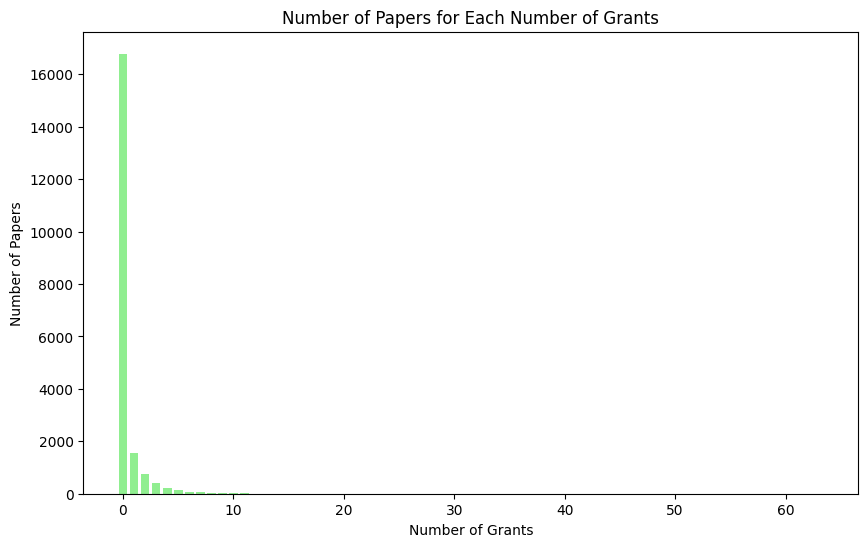

In [74]:
# Plot size of grants per paper
grant_counts = Counter(len(work['grants']) for work in all_works_2019)
# Prepare data for plotting
grant_numbers = list(grant_counts.keys())
grant_paper_counts = list(grant_counts.values())
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(grant_numbers, grant_paper_counts, color='lightgreen')
plt.xlabel('Number of Grants')
plt.ylabel('Number of Papers')
plt.title('Number of Papers for Each Number of Grants')

In [ ]:
# Comprend pas pourquoi ca marche pas (voir cellule suivante -> il y a grants)
all_works_2019['id' == 'https://openalex.org/W2990041408']['has_grant']

False

In [103]:
# Print works with grants
for work in all_works_2019:
    if len(work['grants']) > 0:
        print(f"ID: {work['id']}, Has Grant: {work['has_grant']}, Grant: {work['grants']}")

ID: https://openalex.org/W2990041408, Has Grant: True, Grant: [{'funder': 'https://openalex.org/F4320307770', 'funder_display_name': 'AstraZeneca', 'award_id': 'N/A'}]
ID: https://openalex.org/W2911812451, Has Grant: True, Grant: [{'funder': 'https://openalex.org/F4320307765', 'funder_display_name': 'Pfizer', 'award_id': None}, {'funder': 'https://openalex.org/F4320307776', 'funder_display_name': 'Merck', 'award_id': None}]
ID: https://openalex.org/W2945564879, Has Grant: True, Grant: [{'funder': 'https://openalex.org/F4320310388', 'funder_display_name': 'Novartis Pharmaceuticals Corporation', 'award_id': None}]
ID: https://openalex.org/W2974960379, Has Grant: True, Grant: [{'funder': 'https://openalex.org/F4320306257', 'funder_display_name': 'Boehringer Ingelheim', 'award_id': None}]
ID: https://openalex.org/W2964471257, Has Grant: True, Grant: [{'funder': 'https://openalex.org/F4320307115', 'funder_display_name': 'Bristol-Myers Squibb', 'award_id': None}, {'funder': 'https://openalex

In [108]:
# Print funder names and their counts
funder_counts = Counter()
for work in all_works_2019:
    for grant in work['grants']:
        funder_counts[grant['funder_display_name']] += 1
# Print the funder names and their counts
for funder, count in funder_counts.most_common(10):  # Print top 10 funders
    print(f"Funder: {funder}, Count: {count}")

Funder: National Institutes of Health, Count: 1484
Funder: National Cancer Institute, Count: 602
Funder: National Heart, Lung, and Blood Institute, Count: 521
Funder: National Natural Science Foundation of China, Count: 317
Funder: U.S. Department of Defense, Count: 142
Funder: Cystic Fibrosis Foundation, Count: 138
Funder: National Center for Advancing Translational Sciences, Count: 116
Funder: American Heart Association, Count: 101
Funder: National Institute of Diabetes and Digestive and Kidney Diseases, Count: 100
Funder: AstraZeneca, Count: 86


In [115]:
# Number of funders in funder_counts
num_funders = len(funder_counts)
print(f"Number of funders: {num_funders}")

Number of funders: 1294


In [134]:
# Top funders of works with Chinese coauthors vs without Chinese coauthors
funder_counts_with_chinese = Counter()
funder_counts_without_chinese = Counter()
for work in all_works_2019:
    for grant in work['grants']:
        if work['has_chinese_coauthor']:
            funder_counts_with_chinese[grant['funder_display_name']] += 1
        else:
            funder_counts_without_chinese[grant['funder_display_name']] += 1
# Print the top funders for works with Chinese coauthors
print("Top funders for works with Chinese coauthors:")
for funder, count in funder_counts_with_chinese.most_common(10):  # Print top 10 funders
    print(f"Funder: {funder}, Count: {count}")
# Print the top funders for works without Chinese coauthors
print("Top funders for works without Chinese coauthors:")
for funder, count in funder_counts_without_chinese.most_common(10):  # Print top 10 funders
    print(f"Funder: {funder}, Count: {count}")

Top funders for works with Chinese coauthors:
Funder: National Natural Science Foundation of China, Count: 317
Funder: National Institutes of Health, Count: 130
Funder: National Cancer Institute, Count: 30
Funder: National Heart, Lung, and Blood Institute, Count: 22
Funder: U.S. Department of Defense, Count: 20
Funder: Natural Science Foundation of Guangdong Province, Count: 15
Funder: National Institute on Aging, Count: 12
Funder: China Scholarship Council, Count: 12
Funder: Natural Science Foundation of Shandong Province, Count: 12
Funder: Natural Science Foundation of Tianjin City, Count: 11
Top funders for works without Chinese coauthors:
Funder: National Institutes of Health, Count: 1354
Funder: National Cancer Institute, Count: 572
Funder: National Heart, Lung, and Blood Institute, Count: 499
Funder: Cystic Fibrosis Foundation, Count: 133
Funder: U.S. Department of Defense, Count: 122
Funder: National Center for Advancing Translational Sciences, Count: 114
Funder: National Instit

In [131]:
# Top funders of works with Chinese coauthors vs without Chinese coauthors
funder_counts_with_chinese = Counter()
funder_counts_without_chinese = Counter()
for work in all_works_2018:

    for grant in work['grants']:
        if work['has_chinese_coauthor']:
            funder_counts_with_chinese[grant['funder_display_name']] += 1
        else:
            funder_counts_without_chinese[grant['funder_display_name']] += 1
# Print the top funders for works with Chinese coauthors
print("Top funders for works with Chinese coauthors:")
for funder, count in funder_counts_with_chinese.most_common(10):  # Print top 10 funders
    print(f"Funder: {funder}, Count: {count}")
# Print the top funders for works without Chinese coauthors
print("Top funders for works without Chinese coauthors:")
for funder, count in funder_counts_without_chinese.most_common(10):  # Print top 10 funders
    print(f"Funder: {funder}, Count: {count}")

Top funders for works with Chinese coauthors:
Funder: National Natural Science Foundation of China, Count: 274
Funder: National Institutes of Health, Count: 145
Funder: National Cancer Institute, Count: 31
Funder: U.S. Department of Defense, Count: 27
Funder: National Heart, Lung, and Blood Institute, Count: 25
Funder: Natural Science Foundation of Guangdong Province, Count: 24
Funder: China Scholarship Council, Count: 17
Funder: National Key Research and Development Program of China, Count: 12
Funder: Ministry of Science and Technology, Taiwan, Count: 11
Funder: American Cancer Society, Count: 10
Top funders for works without Chinese coauthors:
Funder: National Institutes of Health, Count: 1340
Funder: National Heart, Lung, and Blood Institute, Count: 553
Funder: National Cancer Institute, Count: 502
Funder: Cystic Fibrosis Foundation, Count: 137
Funder: National Center for Advancing Translational Sciences, Count: 115
Funder: U.S. Department of Defense, Count: 104
Funder: National Ins

Introducing more info on fundings

In [116]:
from pyalex import Funders

In [ ]:
funders = Funders().get()
# List fields of funders object
print(funders[0].keys())

dict_keys(['id', 'display_name', 'alternate_titles', 'country_code', 'description', 'homepage_url', 'image_url', 'image_thumbnail_url', 'grants_count', 'works_count', 'cited_by_count', 'summary_stats', 'ids', 'counts_by_year', 'roles', 'updated_date', 'created_date'])


Construct networks

In [ ]:
# Contruct a graph of funders and papers (nodes are funders and papers, edges are funding)
G_fundings = nx.Graph()
# Add nodes for each work and its funders
for work in all_works_2019:
    work_id = work['id']
    G_fundings.add_node(work_id, type='work')
    for grant in work['grants']:
        funder_name = grant['funder_display_name']
        G_fundings.add_node(funder_name, type='funder')
        G_fundings.add_edge(work_id, funder_name)
# Add attributes to work nodes (citation count, has_chinese_coauthor, has_grant, etc.)
for work in all_works_2019:
    work_id = work['id']
    G_fundings.nodes[work_id]['cited_by_count'] = work['cited_by_count']
    G_fundings.nodes[work_id]['has_chinese_coauthor'] = work['has_chinese_coauthor']
    G_fundings.nodes[work_id]['has_grant'] = work['has_grant']
# Add attributes to funder nodes using funders object (country, type, etc.)
for funder in funders:
    funder_name = funder['display_name']
    if G_fundings.has_node(funder_name):
        G_fundings.nodes[funder_name]['country'] = funder['country_code']
# add nodes for authors and edges between authors and papers
for work in all_works_2019:
    work_id = work['id']
    for authorship in work['authorships']:
        author_id = authorship['author']['id']
        G_fundings.add_node(author_id, type='author')
        G_fundings.add_edge(work_id, author_id)

In [113]:
# Count number of funder nodes in the graph
num_funder_nodes = sum(1 for node, data in G_fundings.nodes(data=True) if data['type'] == 'funder')
print(f"Number of funder nodes in the graph: {num_funder_nodes}")

Number of funder nodes in the graph: 1294


In [142]:
# Count number of author nodes in the graph
num_author_nodes = sum(1 for node, data in G_fundings.nodes(data=True) if data['type'] == 'author')
print(f"Number of author nodes in the graph: {num_author_nodes}")

Number of author nodes in the graph: 88322


In [144]:
# Count the number of authors for each work and store in all_works_2019
for work in all_works_2019:
    work['num_authors'] = len(work['authorships'])
#get total number of authors
total_coauthors = sum(work['num_authors'] for work in all_works_2019)
#get total of unique authors
unique_authors = set()
for work in all_works_2019:
    for author in work['authorships']:
        unique_authors.add(author['author']['id'])

print(f"Total number of authors: {total_coauthors}")
print(f"Total number of unique authors: {len(unique_authors)}")

Total number of authors: 147919
Total number of unique authors: 88322


SURPLUS

In [22]:
# Extract all unique country codes of co-authors
country_codes = set(
    inst.get('country_code') 
    for work in all_works_2018 
    for authorship in work['authorships'] 
    for inst in authorship.get('institutions', []) 
    if 'country_code' in inst
)

# Print the unique country codes
print(f"Different country codes of co-authors: {country_codes}")

Different country codes of co-authors: {'SE', 'UG', 'US', 'AR', 'MW', 'ZW', 'CU', 'NL', 'AZ', 'CA', 'LK', 'LV', 'CM', 'LU', 'CH', 'MC', 'AF', 'HK', 'ID', 'KE', 'CN', 'AT', 'RO', 'RS', 'AM', 'RW', 'SK', 'UZ', 'GE', 'IR', 'EE', 'TN', 'SA', 'KZ', 'CO', 'FI', 'MO', 'IL', 'PA', 'AU', 'TR', 'AE', 'MD', 'SG', 'MX', 'JM', 'BA', 'TT', 'FR', 'QA', 'IT', 'PL', None, 'BY', 'NG', 'KG', 'MA', 'BS', 'RE', 'PH', 'AL', 'HR', 'PE', 'GU', 'MQ', 'MN', 'DE', 'JP', 'HU', 'SI', 'BD', 'ZM', 'DO', 'SS', 'UA', 'ES', 'NZ', 'DM', 'MK', 'NO', 'GB', 'TJ', 'KR', 'TW', 'IS', 'UY', 'RU', 'GH', 'BB', 'LT', 'TZ', 'IQ', 'ZA', 'MY', 'JO', 'PK', 'ET', 'EC', 'GR', 'EG', 'BW', 'IN', 'CR', 'NP', 'CL', 'VE', 'PS', 'PR', 'IE', 'PT', 'GD', 'KH', 'YE', 'DK', 'SY', 'MM', 'MT', 'TH', 'BR', 'MZ', 'PY', 'GP', 'VN', 'BG', 'OM', 'DZ', 'CZ', 'CY', 'KW', 'LB', 'BE'}


In [23]:
# Count institutions in the US and outside the US
us_institutions = set(
    inst['id']
    for work in all_works_2018
    for authorship in work['authorships']
    for inst in authorship.get('institutions', [])
    if inst.get('country_code') == 'US'
)

non_us_institutions = set(
    inst['id']
    for work in all_works_2018
    for authorship in work['authorships']
    for inst in authorship.get('institutions', [])
    if inst.get('country_code') != 'US'
)

cn_institutions = set(
    inst['id']
    for work in all_works_2018
    for authorship in work['authorships']
    for inst in authorship.get('institutions', [])
    if inst.get('country_code') == 'CN'
)

# Print the results
print(f"Number of institutions in the US: {len(us_institutions)}")
print(f"Number of institutions outside the US: {len(non_us_institutions)}")
print(f"Number of institutions in China: {len(cn_institutions)}")

Number of institutions in the US: 3394
Number of institutions outside the US: 4947
Number of institutions in China: 514
